In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
# from google.colab import drive
# drive.mount('drive/')
import skimage
from skimage.transform import resize

In [2]:
%pip install tensorboard
%pip install tensorboard-data-server
%pip install tensorflow
%pip install tensorflow-datasets
%pip install tensorflow-intel
%pip install tensorflow-metadata

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install --ignore-installed --upgrade tensorflow 
%pip install keras
import keras
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from keras.models import Model
# from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7

ERROR: Could not install packages due to an OSError: [WinError 5] Accès refusé: 'C:\\Users\\Yann LAVRY\\anaconda3\\Lib\\site-packages\\numpy\\core\\_multiarray_tests.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



Note: you may need to restart the kernel to use updated packages.


In [4]:
dataset_path="malaria_hematie_dataset/"
parasitized_path=os.path.join(dataset_path, "parasitized")
uninfected_path=os.path.join(dataset_path, "uninfected")

parasitized_names=os.listdir(parasitized_path)
uninfected_names=os.listdir(uninfected_path)


parasitized_array = np.zeros(shape=(14000, 224, 224)) #13779
uninfected_array = np.zeros(shape=(14000, 224, 224))



In [5]:
def import_data(images_names,path,images_array):
    for index,filename in enumerate(images_names):
      image_path = os.path.join(path, filename)
      images_array[index] = resize(skimage.io.imread(image_path,as_gray=True), (224,224))


In [6]:
import_data(uninfected_names,uninfected_path,uninfected_array)

In [7]:
import matplotlib.pyplot as plt
def plot_images(images_array, num_images=10):
    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images_array[i], cmap='gray')
        plt.axis('off')
    plt.show()

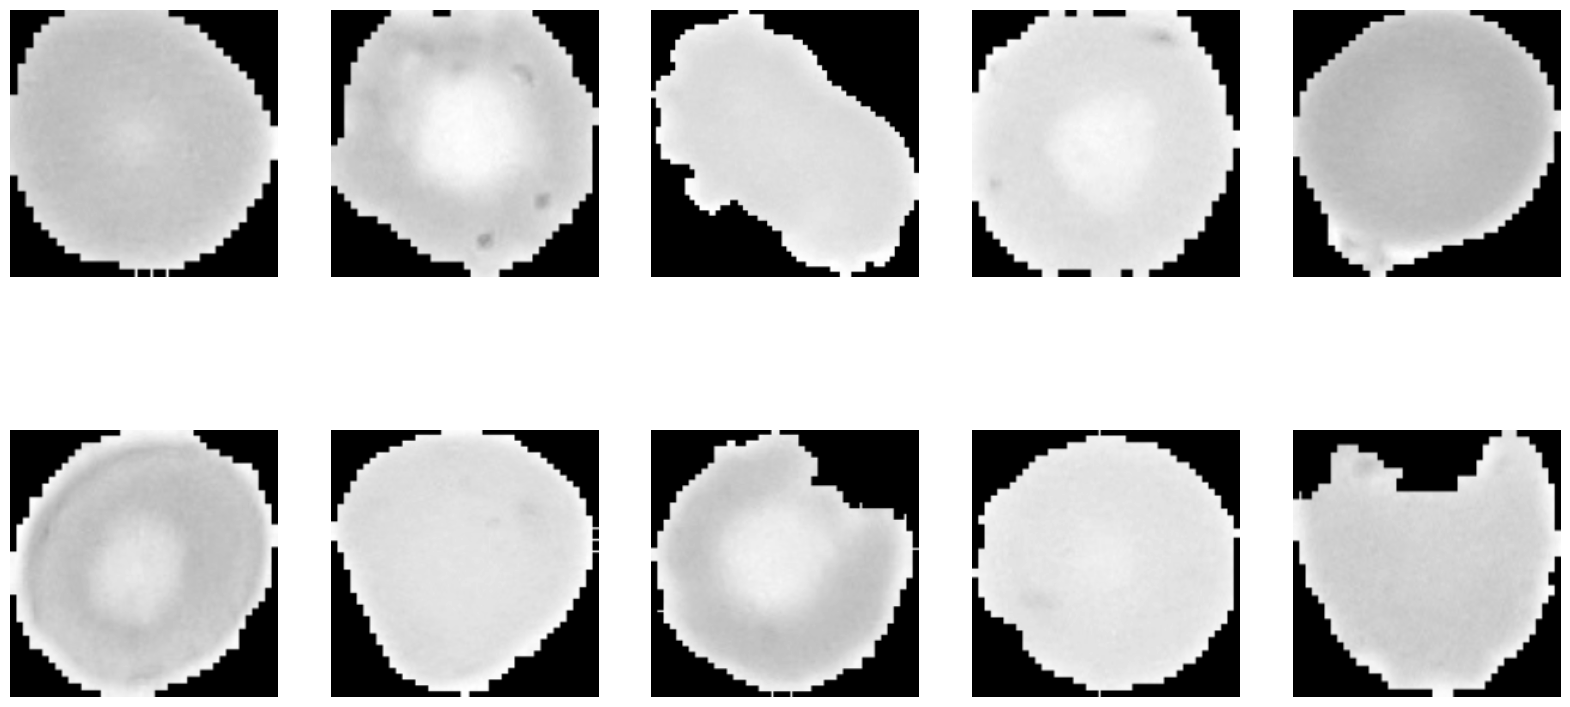

In [8]:
plot_images(uninfected_array)

In [9]:
import_data(parasitized_names,parasitized_path,parasitized_array)


In [10]:
import pandas as pd
df2 = pd.DataFrame(parasitized_names,
                   columns=['name'])
df2

,name
0,image_10000.png
1,image_10001.png
2,image_10002.png
3,image_10003.png
4,image_10004.png
...,...
13774,image_999.png
13775,image_9994.png
13776,image_9996.png
13777,image_9997.png


In [11]:
df2["type"]="sick"

In [12]:
df2

,name,type
0,image_10000.png,sick
1,image_10001.png,sick
2,image_10002.png,sick
3,image_10003.png,sick
4,image_10004.png,sick
...,...,...
13774,image_999.png,sick
13775,image_9994.png,sick
13776,image_9996.png,sick
13777,image_9997.png,sick


In [13]:
df1 = pd.DataFrame(uninfected_names,
                   columns=['name'])

In [14]:
df1["type"]="safe"

In [18]:
def train_test_split_new(image_array,encoded):
  images_n_array = image_array.astype("float32") / (255 - 0)
  images_n_array = np.expand_dims(images_n_array, axis=-1)
  split_index = int(image_array.shape[0] * 0.85)
  x_train_image_array = images_n_array[:split_index, : , :]
  x_test_image_array = images_n_array[split_index:, : , : ]
  y_train_image_array=encoded.iloc[:split_index]
  y_test_image_array=encoded.iloc[split_index:]
  return images_n_array,x_train_image_array,x_test_image_array,y_train_image_array,y_test_image_array
# from sklearn.model_selection import train_test_split

In [57]:
df1

,name,type
0,image_0.png,safe
1,image_1.png,safe
2,image_10.png,safe
3,image_100.png,safe
4,image_1000.png,safe
...,...,...
13774,image_9991.png,safe
13775,image_9992.png,safe
13776,image_9993.png,safe
13777,image_9995.png,safe


In [19]:
parasitized_n_array,x_train_parasitized_array,x_test_parasitized_array,y_train_parasitized_array,y_test_parasitized_array=train_test_split_new(parasitized_array,df2[["type"]])

In [56]:
y_train_parasitized_array

,type
0,sick
1,sick
2,sick
3,sick
4,sick
...,...
11895,sick
11896,sick
11897,sick
11898,sick


In [58]:
uninfected_n_array,x_train_uninfected_array,x_test_uninfected_array,y_train_uninfected_array,y_test_uninfected_array=train_test_split_new(uninfected_array,df1[["type"]])

In [59]:
data_augmentation_generator = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    shear_range=0.2,
    validation_split=0.15,
)



In [60]:
uninfected_train_generator = data_augmentation_generator.flow(x_train_uninfected_array, batch_size=16, subset="training", seed=42)
parasitized_train_generator = data_augmentation_generator.flow(x_train_parasitized_array, batch_size=16, subset="training", seed=42)

uninfected_val_generator = data_augmentation_generator.flow(x_train_uninfected_array, batch_size=16, subset="validation", seed=42)
parasitized_val_generator = data_augmentation_generator.flow(x_train_parasitized_array, batch_size=16, subset="validation", seed=42)

train_generator = zip(uninfected_train_generator, parasitized_train_generator)
val_generator = zip(uninfected_val_generator, parasitized_val_generator)

In [61]:
def combined_generator(gen1, gen2):
    while True:
        data1 = next(gen1)
        data2 = next(gen2)
        combined_data = np.concatenate((data1[0], data2[0]), axis=0)
        combined_labels = np.concatenate((data1[1], data2[1]), axis=0)
        yield combined_data, combined_labels

In [62]:
train_generator_v2 = combined_generator(uninfected_train_generator, parasitized_train_generator)
val_generator_v2 = combined_generator(uninfected_val_generator, parasitized_val_generator)


In [ ]:
y_train_label=pd.concat([y_train_uninfected_array, y_train_parasitized_array], ignore_index=True)

y_test_label=pd.concat([y_test_uninfected_array, y_test_parasitized_array], ignore_index=True)
df=pd.concat([df1, df2], ignore_index=True)

In [ ]:
result_vertical = np.concatenate((uninfected_array, parasitized_array))

In [79]:
from sklearn.model_selection import train_test_split

# Divisez les données en ensembles d'entraînement et de validation
train_images, val_images, train_labels, val_labels = train_test_split(result_vertical, df, test_size=0.2, random_state=42)

,type
0,safe
1,safe
2,safe
3,safe
4,safe
...,...
23795,sick
23796,sick
23797,sick
23798,sick


In [1]:
batch_images, batch_labels = next(train_generator)

# Fonction pour afficher un batch d'images
# def plot_batch(images, labels, num_images=10):
#     plt.figure(figsize=(20, 10))
#     for i in range(num_images):
#         plt.subplot(2, num_images // 2, i + 1)
#         plt.imshow(images[i].squeeze(), cmap='gray')
#         plt.axis('off')
#     plt.show()

# # Afficher les images du batch
# plot_batch(batch_images, batch_labels)
print(batch_images[0])

NameError: name 'train_generator' is not defined

In [64]:
y_test_uninfected_array

,type
11900,safe
11901,safe
11902,safe
11903,safe
11904,safe
...,...
13774,safe
13775,safe
13776,safe
13777,safe


In [65]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Determiner les dimensions (width and height) pour notre preprocessed images
img_height, img_width, channels = batch_images.shape[1:]

# Determiner le npbbre de classes unique depuis encoded labels : 2 classes
num_classes = 2

# Vérifier le nbr de classe et le input correcte
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, channels)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

C:\Users\Yann LAVRY\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
from keras.applications import VGG16
from keras.models import Model

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Récupération de l'encodeur pré-entraîné
for layer in base_model.layers:
    layer.trainable = False

# Ajout des couches Dense
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model_vgg = Model(inputs=base_model.input, outputs=predictions)

In [67]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [80]:
# Définition des callbacks
callbacks = [
    EarlyStopping(patience=3, monitor='val_loss'),
    ReduceLROnPlateau(factor=0.1, patience=2, monitor='val_loss')
]

# Compilation et entraînement des modèles
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(batch_images, y_train_label, epochs=10, validation_split=0.2, callbacks=callbacks)

Epoch 1/10


UnimplementedError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/Cast defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\Yann LAVRY\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\Yann LAVRY\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "C:\Users\Yann LAVRY\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start

  File "C:\Users\Yann LAVRY\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Users\Yann LAVRY\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Users\Yann LAVRY\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Users\Yann LAVRY\anaconda3\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\Yann LAVRY\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue

  File "C:\Users\Yann LAVRY\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one

  File "C:\Users\Yann LAVRY\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell

  File "C:\Users\Yann LAVRY\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request

  File "C:\Users\Yann LAVRY\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "C:\Users\Yann LAVRY\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell

  File "C:\Users\Yann LAVRY\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell

  File "C:\Users\Yann LAVRY\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell

  File "C:\Users\Yann LAVRY\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\Yann LAVRY\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async

  File "C:\Users\Yann LAVRY\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes

  File "C:\Users\Yann LAVRY\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code

  File "C:\Users\Yann LAVRY\AppData\Local\Temp\ipykernel_26472\1384095743.py", line 9, in <module>

  File "C:\Users\Yann LAVRY\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\Yann LAVRY\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 314, in fit

  File "C:\Users\Yann LAVRY\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 117, in one_step_on_iterator

  File "C:\Users\Yann LAVRY\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 104, in one_step_on_data

  File "C:\Users\Yann LAVRY\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 54, in train_step

  File "C:\Users\Yann LAVRY\anaconda3\Lib\site-packages\keras\src\trainers\trainer.py", line 316, in compute_loss

  File "C:\Users\Yann LAVRY\anaconda3\Lib\site-packages\keras\src\trainers\compile_utils.py", line 609, in __call__

  File "C:\Users\Yann LAVRY\anaconda3\Lib\site-packages\keras\src\trainers\compile_utils.py", line 645, in call

  File "C:\Users\Yann LAVRY\anaconda3\Lib\site-packages\keras\src\losses\loss.py", line 39, in __call__

  File "C:\Users\Yann LAVRY\anaconda3\Lib\site-packages\keras\src\tree\tree_api.py", line 148, in map_structure

  File "C:\Users\Yann LAVRY\anaconda3\Lib\site-packages\keras\src\tree\optree_impl.py", line 79, in map_structure

  File "C:\Users\Yann LAVRY\anaconda3\Lib\site-packages\optree\ops.py", line 594, in tree_map

  File "C:\Users\Yann LAVRY\anaconda3\Lib\site-packages\keras\src\losses\loss.py", line 40, in <lambda>

  File "C:\Users\Yann LAVRY\anaconda3\Lib\site-packages\keras\src\ops\core.py", line 495, in convert_to_tensor

  File "C:\Users\Yann LAVRY\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\core.py", line 120, in convert_to_tensor

Cast string to float is not supported
	 [[{{node compile_loss/sparse_categorical_crossentropy/Cast}}]] [Op:__inference_one_step_on_iterator_8799]